In [5]:
# All the Hits 
import matplotlib.pyplot as plt 
import pandas as pd

# Upload the data
df = pd.read_csv("Multiparameter_Sweep_Runs.csv")

print(df)

         Label  Temperature [°C]  NaOH Concentration [mM]  \
0        Run_1              20.0                     32.0   
1        Run_2              20.0                     32.0   
2        Run_3              20.0                     32.0   
3        Run_4              20.0                     32.0   
4        Run_5              20.0                     32.0   
...        ...               ...                      ...   
7915  Run_7916             100.0                   1000.0   
7916  Run_7917             100.0                   1000.0   
7917  Run_7918             100.0                   1000.0   
7918  Run_7919             100.0                   1000.0   
7919  Run_7920             100.0                   1000.0   

      Mg++ Concentration [mM]  Seed Volume Fraction [m^3 mineral/m^3 medium]  \
0                        32.0                                   1.000000e-10   
1                        32.0                                   1.000000e-09   
2                        32

In [6]:

# Convert 'NaN' strings to actual NaN values
df['Carbonation_Percentage'] = pd.to_numeric(df['Carbonation_Percentage'], errors='coerce')
df['Reaction_Rate'] = pd.to_numeric(df['Reaction_Rate'], errors='coerce')

# Cap 'Carbonation_Percentage' at 100%
df['Carbonation_Percentage'] = df['Carbonation_Percentage'].clip(upper=100)

# Remove rows with NaN in 'Carbonation_Percentage' or 'Reaction_Rate'
df_cleaned = df.dropna(subset=['Carbonation_Percentage', 'Reaction_Rate'])

print(len(df_cleaned))
print(df_cleaned)

7894
         Label  Temperature [°C]  NaOH Concentration [mM]  \
0        Run_1              20.0                     32.0   
1        Run_2              20.0                     32.0   
2        Run_3              20.0                     32.0   
3        Run_4              20.0                     32.0   
4        Run_5              20.0                     32.0   
...        ...               ...                      ...   
7915  Run_7916             100.0                   1000.0   
7916  Run_7917             100.0                   1000.0   
7917  Run_7918             100.0                   1000.0   
7918  Run_7919             100.0                   1000.0   
7919  Run_7920             100.0                   1000.0   

      Mg++ Concentration [mM]  Seed Volume Fraction [m^3 mineral/m^3 medium]  \
0                        32.0                                   1.000000e-10   
1                        32.0                                   1.000000e-09   
2                     

In [7]:
# Transform the reaction rate from mol/(kgw * hr) to gCO2/(m^2 * year) Assuming these reactions occur at a surface area of 1 m^2

df_cleaned.loc[:, 'Reaction_Rate'] = df_cleaned['Reaction_Rate'] * 0.015 * 1 * 44 * 8760

# Save the cleaned DataFrame back to the CSV file
df_cleaned.to_csv("Cleaned Multiparameter_Sweep_Runs.csv", index=False)

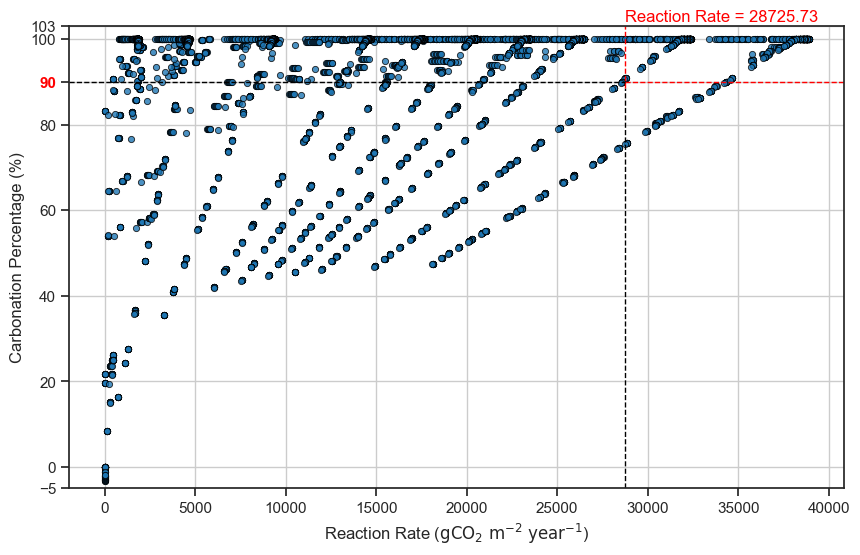

In [5]:
import seaborn as sns 

sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Reaction_Rate'], df_cleaned['Carbonation_Percentage'], edgecolor = 'black', color='tab:blue', alpha = 0.8, s = 20, linewidth = 0.65)

# Label the axes
plt.xlabel(r'Reaction Rate ($\mathrm{gCO_2\ m^{-2}\ year^{-1}}$)')
plt.ylabel('Carbonation Percentage (%)')

# Define the intersection point
intersection_x = 28725.72676
intersection_y = 90  # This is the carbonation percentage at which you want the line to change color

# Get the current plot limits
x_limits = plt.gca().get_xlim()
y_limits = plt.gca().get_ylim()

# Plot the horizontal line in two parts
if y_limits[0] <= intersection_y <= y_limits[1]:
    # Plot before intersection (black)
    plt.axhline(y=intersection_y, xmin=0, xmax=(intersection_x - x_limits[0]) / (x_limits[1] - x_limits[0]), color='black', linestyle='--', linewidth=1)
    # Plot after intersection (red)
    plt.axhline(y=intersection_y, xmin=(intersection_x - x_limits[0]) / (x_limits[1] - x_limits[0]), xmax=1, color='red', linestyle='--', linewidth=1)

# Plot the vertical line in two parts
if x_limits[0] <= intersection_x <= x_limits[1]:
    # Plot before intersection (black)
    plt.axvline(x=intersection_x, ymin=0, ymax=(intersection_y - y_limits[0]) / (y_limits[1] - y_limits[0]), color='black', linestyle='--', linewidth=1)
    # Plot after intersection (red)
    plt.axvline(x=intersection_x, ymin=(intersection_y - y_limits[0]) / (y_limits[1] - y_limits[0]), ymax=1, color='red', linestyle='--', linewidth=1)
    # Add label for the vertical line
    plt.text(intersection_x, y_limits[1] - 1, 'Reaction Rate = {:.2f}'.format(intersection_x), color='red', ha='left')

# Get the current y-ticks and add 90 if it is not already present
yticks = plt.gca().get_yticks()
if 90 not in yticks:
    yticks = list(yticks) + [90]  # Add 90 to the list of y-ticks
    yticks.sort()  # Ensure they remain in order

plt.ylim(-5, 102)    # Limit the y-axis to 100 to remove extra space above

# Manually adjust the first and last entries of yticks
yticks[0] = -5  # Set the first value to match the lower limit
yticks[-1] = 103  # Set the last value to match the upper limit

# Set the new y-ticks
plt.gca().set_yticks(yticks)


# Change the color of the 90% tick to red
for label in plt.gca().get_yticklabels():
    if label.get_text() == '90':
        label.set_color('red')
        label.set_fontweight('bold')


# Title and grid for better readability
plt.grid(True)

plt.savefig("Figure Images/Initial Sweep.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png") 
plt.savefig("Figure SVG/Initial Sweep.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Display the plot
plt.show()


In [1]:
# Analyze the Parameter_Sweep_Hits Data

import pandas as pd
import matplotlib.pyplot as plt 

# Upload the data
# Filter rows where Carbonation_Percentage >= 90% and Reaction_Rate >= 28725.72676
filtered_df = df_cleaned[(df_cleaned['Carbonation_Percentage'] >= 90) & 
                         (df_cleaned['Reaction_Rate'] >= 28725.72676)]

# Cap 'Carbonation_Percentage' at 100%
filtered_df['Carbonation_Percentage'] = filtered_df['Carbonation_Percentage'].clip(upper=100)

filtered_df.to_csv("Cleaned Parameter_Sweep_Hits.csv")

filtered_df = pd.read_csv("Cleaned Parameter_Sweep_Hits.csv")

print(filtered_df)

     Unnamed: 0     Label  Temperature [°C]  NaOH Concentration [mM]  \
0           318   Run_319              20.0                    200.0   
1           319   Run_320              20.0                    200.0   
2           388   Run_389              20.0                    300.0   
3           389   Run_390              20.0                    300.0   
4           390   Run_391              20.0                    300.0   
..          ...       ...               ...                      ...   
907        7915  Run_7916             100.0                   1000.0   
908        7916  Run_7917             100.0                   1000.0   
909        7917  Run_7918             100.0                   1000.0   
910        7918  Run_7919             100.0                   1000.0   
911        7919  Run_7920             100.0                   1000.0   

     Mg++ Concentration [mM]  Seed Volume Fraction [m^3 mineral/m^3 medium]  \
0                      660.0                            

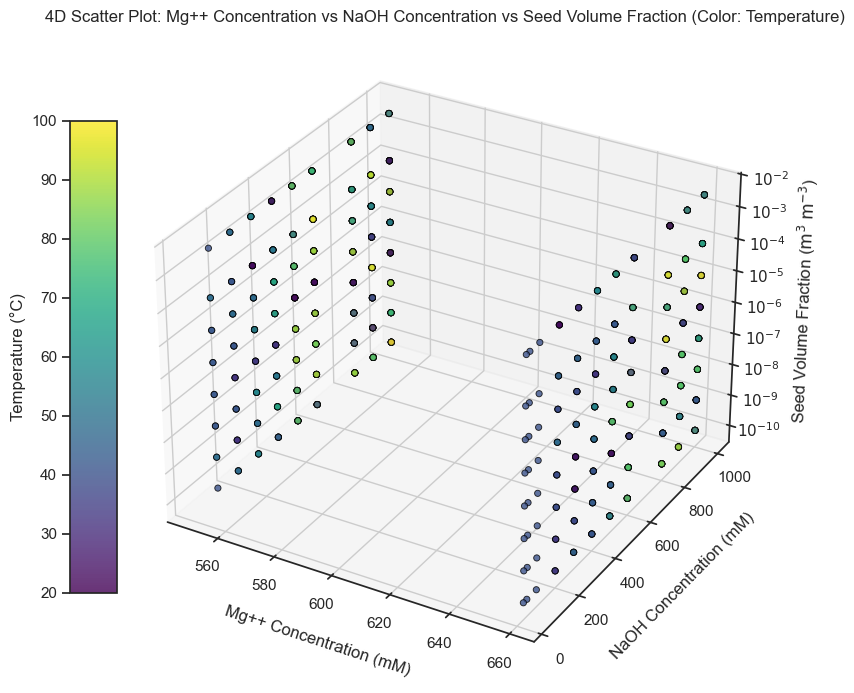

In [3]:
# Create the 4D scatter plot

import seaborn as sns

sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

import numpy as np

# Take the log10 of the z-values for plotting
filtered_df['Log Seed Volume Fraction'] = np.log10(filtered_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'])

fig = plt.figure(figsize=(14, 10))

fig.patch.set_facecolor('white')  # Set the background of the figure to white
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')  # Set the background of the axes to white

# Scatter plot with color representing temperature
scatter = ax.scatter(filtered_df['Mg++ Concentration [mM]'], 
                     filtered_df['NaOH Concentration [mM]'], 
                     filtered_df['Log Seed Volume Fraction'], 
                     c=filtered_df['Temperature [°C]'], cmap='viridis', marker='o', edgecolor = 'black', alpha = 0.8, s = 20, linewidth = 0.65)

# Set custom z-ticks (evenly spaced, transformed back to powers of 10)
z_ticks = range(-10, -1)  # Evenly spaced values (-10 to -2)
ax.set_zticks(z_ticks)  # Set these tick positions
ax.set_zticklabels([f'$10^{{{i}}}$' for i in z_ticks])  # Properly formatted labels as 10^-10, 10^-9, ...

# Add axis labels
ax.set_xlabel('Mg++ Concentration (mM)', labelpad=10)
ax.set_ylabel('NaOH Concentration (mM)', labelpad=10)
ax.set_zlabel(r'Seed Volume Fraction ($\mathrm{m^3\ m^{-3}}$)', labelpad=10)


# Adjust tick padding to avoid overlap
ax.tick_params(axis='z', pad=5)

# Set grid to white
ax.grid(True, color='white')  # Set grid color to white

# Add a color bar to show the temperature scale
cbar = plt.colorbar(scatter, ax=ax, pad=0.001, shrink=0.5, aspect=10, location='left')
cbar.set_label('Temperature (°C)')

# Title for the plot
ax.set_title('4D Scatter Plot: Mg++ Concentration vs NaOH Concentration vs Seed Volume Fraction (Color: Temperature)')


# Adjust the layout to prevent cutting off of labels
plt.subplots_adjust(left=0.1, right=200, top=0.9, bottom=0.1)

# Automatically adjust layout
fig.tight_layout()

# plt.savefig("Figure Images/4D_Scatter_Plot.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png") 
# plt.savefig("Figure SVG/4D_Scatter_Plot.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Show plot
plt.show()

In [42]:
# Analyze the Number of Hits that are Positive 

print(len(df_cleaned))
print(len(filtered_df))

print(len(filtered_df)/len(df_cleaned))

# Get the minimum value of each column
min_values = filtered_df.min()

# Get the maximum value of each column
max_values = filtered_df.max()

print("Minimum values:\n", min_values)
print("Maximum values:\n", max_values)

# Save to CSV files
min_values.to_csv("min_values.csv", header=True)  # Save as CSV with column names
max_values.to_csv("max_values.csv", header=True)  # Save as CSV with column names


7894
912
0.11553078287306816
Minimum values:
 Label                                                Run_1185
Temperature [°C]                                         20.0
NaOH Concentration [mM]                                  32.0
Mg++ Concentration [mM]                                 550.0
Seed Volume Fraction [m^3 mineral/m^3 medium]             0.0
Carbonation_Percentage                              90.036827
Reaction_Rate                                    28747.460731
Log Seed Volume Fraction                                -10.0
dtype: object
Maximum values:
 Label                                                 Run_880
Temperature [°C]                                        100.0
NaOH Concentration [mM]                                1000.0
Mg++ Concentration [mM]                                 660.0
Seed Volume Fraction [m^3 mineral/m^3 medium]          0.0032
Carbonation_Percentage                                  100.0
Reaction_Rate                                    38913.

/var/folders/0c/669xgdcd3jv4h9p6zv4ly5gm0000gn/T/ipykernel_5218/3859465266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log Seed Volume Fraction'] = np.log10(df_cleaned['Seed Volume Fraction [m^3 mineral/m^3 medium]'])


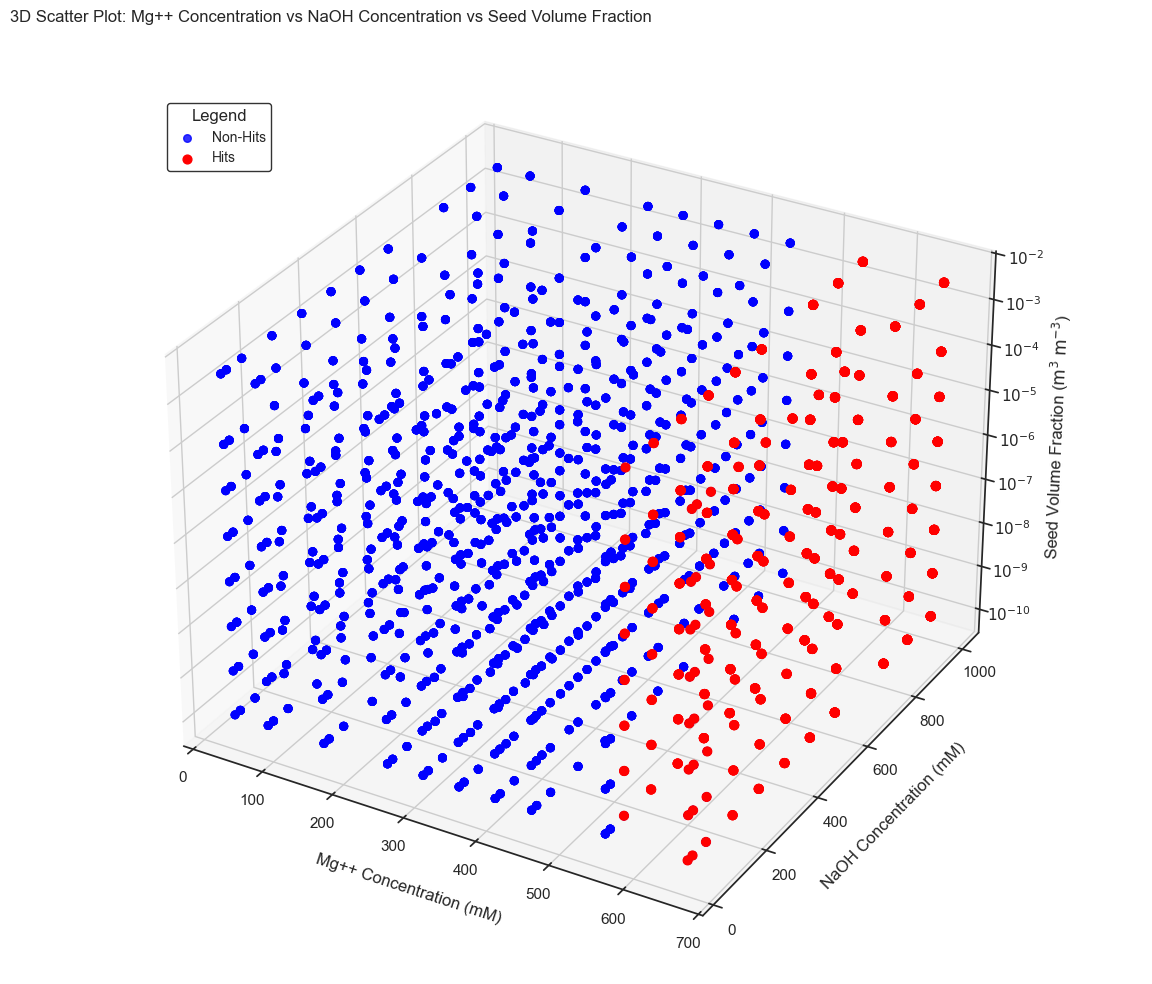

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

# Take the log10 of the z-values for plotting
df_cleaned['Log Seed Volume Fraction'] = np.log10(df_cleaned['Seed Volume Fraction [m^3 mineral/m^3 medium]'])
filtered_df['Log Seed Volume Fraction'] = np.log10(filtered_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'])

fig = plt.figure(figsize=(14, 10))

fig.patch.set_facecolor('white')  # Set the background of the figure to white
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')  # Set the background of the axes to white

# Plot points not in filtered_df (blue spheres)
non_filtered_df = df_cleaned[~df_cleaned.index.isin(filtered_df.index)]
scatter_non_filtered = ax.scatter(non_filtered_df['Mg++ Concentration [mM]'], 
                                   non_filtered_df['NaOH Concentration [mM]'], 
                                   non_filtered_df['Log Seed Volume Fraction'], 
                                   c='blue', marker='o', alpha=0.8, s=30, label = 'Non-Hits')

# Plot points in filtered_df (red spheres)
scatter_filtered = ax.scatter(filtered_df['Mg++ Concentration [mM]'], 
                               filtered_df['NaOH Concentration [mM]'], 
                               filtered_df['Log Seed Volume Fraction'], 
                               c='red', marker='o', alpha=1.0, s=40, label = "Hits")

# Set custom z-ticks (evenly spaced, transformed back to powers of 10)
z_ticks = range(-10, -1)  # Evenly spaced values (-10 to -2)
ax.set_zticks(z_ticks)  # Set these tick positions
ax.set_zticklabels([f'$10^{{{i}}}$' for i in z_ticks])  # Properly formatted labels as 10^-10, 10^-9, ...

# Add axis labels
ax.set_xlabel('Mg++ Concentration (mM)', labelpad=10)
ax.set_ylabel('NaOH Concentration (mM)', labelpad=10)
ax.set_zlabel(r'Seed Volume Fraction ($\mathrm{m^3\ m^{-3}}$)', labelpad=10)

# Adjust tick padding to avoid overlap
ax.tick_params(axis='z', pad=5)

# Set grid to white
ax.grid(True, color='white')  # Set grid color to white

# Add legend
legend = ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), title="Legend", fontsize=10, title_fontsize=12, frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

# Title for the plot
ax.set_title('3D Scatter Plot: Mg++ Concentration vs NaOH Concentration vs Seed Volume Fraction                                                                                                          ', pad=20)

# Adjust the layout to prevent cutting off of labels
plt.subplots_adjust(left=0.1, right=100000, top=0.9, bottom=0.1)

# Automatically adjust layout
fig.tight_layout()

# Save the plot as PNG and SVG
# plt.savefig("Figure Images/Colored_3D_Scatter_Plot.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png")
# plt.savefig("Figure SVG/Colored_3D_Scatter_Plot.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Show the plot
plt.show()



/var/folders/0c/669xgdcd3jv4h9p6zv4ly5gm0000gn/T/ipykernel_5218/3843713281.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_20C_df['Log Seed Volume Fraction'] = np.log10(filtered_20C_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'])


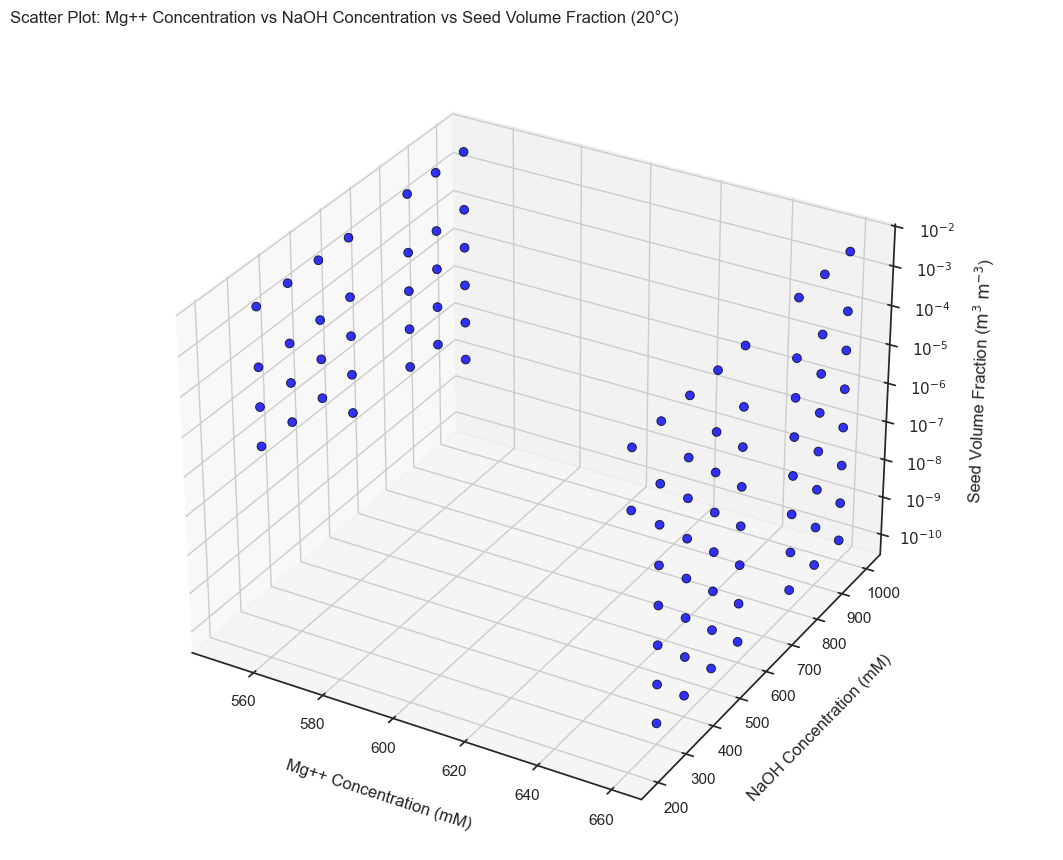

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

# Filter `filtered_df` for points with a temperature of 20°C
filtered_20C_df = filtered_df[filtered_df['Temperature [°C]'] == 20]

# Take the log10 of the z-values for plotting
filtered_20C_df['Log Seed Volume Fraction'] = np.log10(filtered_20C_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'])

fig = plt.figure(figsize=(14, 10))

fig.patch.set_facecolor('white')  # Set the background of the figure to white
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')  # Set the background of the axes to white

# Scatter plot with color representing temperature
scatter = ax.scatter(filtered_20C_df['Mg++ Concentration [mM]'], 
                     filtered_20C_df['NaOH Concentration [mM]'], 
                     filtered_20C_df['Log Seed Volume Fraction'], 
                     c='blue', marker='o', edgecolor='black', alpha=0.8, s=40, linewidth=0.65)

# Set custom z-ticks (evenly spaced, transformed back to powers of 10)
z_ticks = range(-10, -1)  # Evenly spaced values (-10 to -2)
ax.set_zticks(z_ticks)  # Set these tick positions
ax.set_zticklabels([f'$10^{{{i}}}$' for i in z_ticks])  # Properly formatted labels as 10^-10, 10^-9, ...

# Add axis labels
ax.set_xlabel('Mg++ Concentration (mM)', labelpad=15)
ax.set_ylabel('NaOH Concentration (mM)', labelpad=15)
ax.set_zlabel(r'Seed Volume Fraction ($\mathrm{m^3\ m^{-3}}$)', labelpad=20)

# Adjust tick padding to avoid overlap
ax.tick_params(axis='z', pad=10)

# Set grid to white
ax.grid(True, color='white')  # Set grid color to white

# Title for the plot
ax.set_title('Scatter Plot: Mg++ Concentration vs NaOH Concentration vs Seed Volume Fraction (20°C)                                                                                 ', pad=20)

# Adjust layout to prevent cutting off of labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the plot as PNG and SVG
# plt.savefig("Figure Images/Scatter_Plot_20C.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png")
# plt.savefig("Figure SVG/Scatter_Plot_20C.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Show plot
plt.show()


/var/folders/0c/669xgdcd3jv4h9p6zv4ly5gm0000gn/T/ipykernel_5218/3135700619.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_32mM_df['Log Seed Volume Fraction'] = np.log10(filtered_32mM_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'])


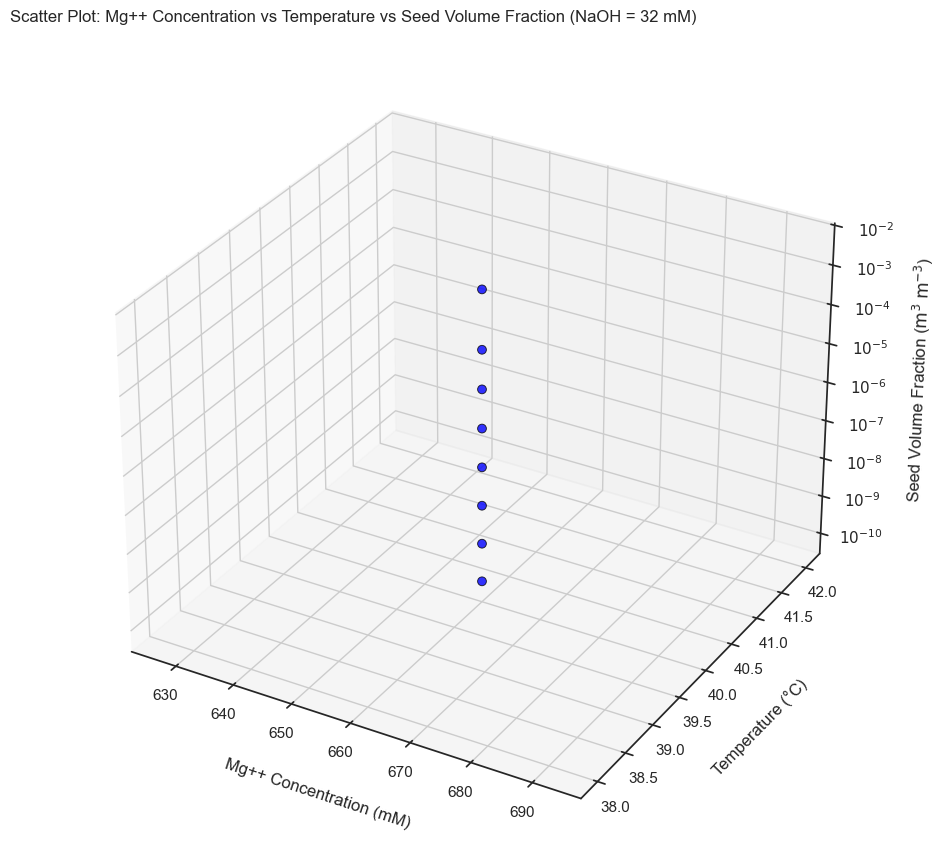

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

# Filter `filtered_df` for points with a NaOH Concentration of 32 mM
filtered_32mM_df = filtered_df[filtered_df['NaOH Concentration [mM]'] == 32]

# Take the log10 of the z-values for plotting
filtered_32mM_df['Log Seed Volume Fraction'] = np.log10(filtered_32mM_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'])

fig = plt.figure(figsize=(14, 10))

fig.patch.set_facecolor('white')  # Set the background of the figure to white
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')  # Set the background of the axes to white

# Scatter plot with color representing temperature
scatter = ax.scatter(filtered_32mM_df['Mg++ Concentration [mM]'], 
                     filtered_32mM_df['Temperature [°C]'], 
                     filtered_32mM_df['Log Seed Volume Fraction'], 
                     c='blue', marker='o', edgecolor='black', alpha=0.8, s=40, linewidth=0.65)

# Set custom z-ticks (evenly spaced, transformed back to powers of 10)
z_ticks = range(-10, -1)  # Evenly spaced values (-10 to -2)
ax.set_zticks(z_ticks)  # Set these tick positions
ax.set_zticklabels([f'$10^{{{i}}}$' for i in z_ticks])  # Properly formatted labels as 10^-10, 10^-9, ...

# Add axis labels
ax.set_xlabel('Mg++ Concentration (mM)', labelpad=15)
ax.set_ylabel('Temperature (°C)', labelpad=15)
ax.set_zlabel(r'Seed Volume Fraction ($\mathrm{m^3\ m^{-3}}$)', labelpad=20)

# Adjust tick padding to avoid overlap
ax.tick_params(axis='z', pad=10)

# Set grid to white
ax.grid(True, color='white')  # Set grid color to white

# Title for the plot
ax.set_title('Scatter Plot: Mg++ Concentration vs Temperature vs Seed Volume Fraction (NaOH = 32 mM)                                                   ', pad=20)

# Adjust layout to prevent cutting off of labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the plot as PNG and SVG
# plt.savefig("Figure Images/Scatter_Plot_32mM.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png")
# plt.savefig("Figure SVG/Scatter_Plot_32mM.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Show plot
plt.show()


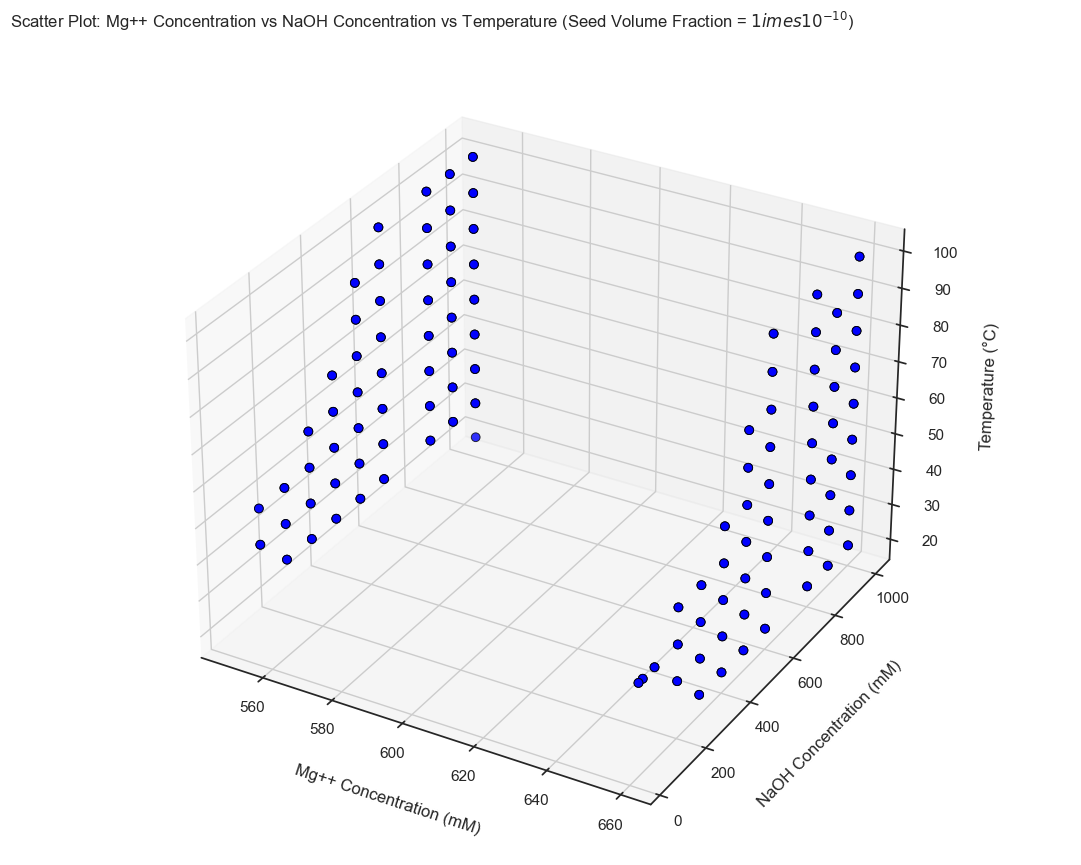

Number of rows: 276
Percentage of rows: 83.64%


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are preserved as text in SVG

# Filter `filtered_df` for points with a Seed Volume Fraction of 1E-10
filtered_1E10_df = filtered_df[np.isclose(filtered_df['Seed Volume Fraction [m^3 mineral/m^3 medium]'], 1E-10)]

fig = plt.figure(figsize=(14, 10))

fig.patch.set_facecolor('white')  # Set the background of the figure to white
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')  # Set the background of the axes to white

# Scatter plot with color representing points
scatter = ax.scatter(filtered_1E10_df['Mg++ Concentration [mM]'], 
                     filtered_1E10_df['NaOH Concentration [mM]'], 
                     filtered_1E10_df['Temperature [°C]'], 
                     c='blue', marker='o', edgecolor='black', alpha=0.8, s=40, linewidth=0.65)

# Add axis labels
ax.set_xlabel('Mg++ Concentration (mM)', labelpad=15)
ax.set_ylabel('NaOH Concentration (mM)', labelpad=15)
ax.set_zlabel('Temperature (°C)', labelpad=20)

# Adjust tick padding to avoid overlap
ax.tick_params(axis='z', pad=10)

# Set grid to white
ax.grid(True, color='white')  # Set grid color to white

# Title for the plot
ax.set_title('Scatter Plot: Mg++ Concentration vs NaOH Concentration vs Temperature (Seed Volume Fraction = $1 \times 10^{-10}$)                                                ', pad=20)

# Adjust layout to prevent cutting off of labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the plot as PNG and SVG
# plt.savefig("Figure Images/Scatter_Plot_1E-10.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png")
# plt.savefig("Figure SVG/Scatter_Plot_1E-10.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Show plot
plt.show()

# Calculate the number of rows meeting the conditions
num_rows = len(filtered_1E10_df[
    (filtered_1E10_df['Temperature [°C]'] >= 30) &
    (filtered_1E10_df['NaOH Concentration [mM]'] >= 300)
])

# Calculate the percentage of rows meeting the conditions
percentage_rows = (num_rows / len(filtered_1E10_df)) * 100 if len(filtered_1E10_df) > 0 else 0

# Output the results
print(f"Number of rows: {num_rows}")
print(f"Percentage of rows: {percentage_rows:.2f}%")

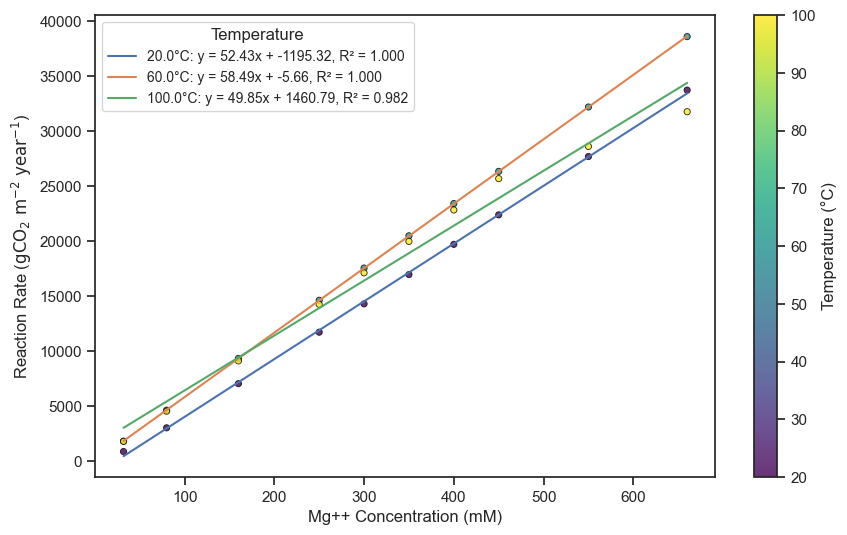

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Apply filters
Volume_fraction_filter = df_cleaned['Seed Volume Fraction [m^3 mineral/m^3 medium]'] == 1.0 * 10**-10
NaOH_filter = df_cleaned['NaOH Concentration [mM]'] == 500
Temperature_filter = (
    (df_cleaned['Temperature [°C]'] == 20) |
    (df_cleaned['Temperature [°C]'] == 60) |
    (df_cleaned['Temperature [°C]'] == 100)
)

# Combine all filters
df_filter = df_cleaned.loc[Volume_fraction_filter & NaOH_filter & Temperature_filter]

# Initialize the plot
sns.set_theme(style="ticks")
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(
   df_filter ['Mg++ Concentration [mM]'],
    df_filter ['Reaction_Rate'],
    c=df_filter ['Temperature [°C]'],
    cmap='viridis',
    edgecolor='black',
    alpha=0.8,
    s=20,
    linewidth=0.65,
)

# Group data by temperature
grouped = df_filter.groupby('Temperature [°C]')

# Fit and plot linear regression lines for each temperature group
legend_entries = []
for temp, group in grouped:
    X = group['Mg++ Concentration [mM]'].values.reshape(-1, 1)
    y = group['Reaction_Rate'].values
    
    # Fit linear regression
    model = LinearRegression().fit(X, y)
    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generate X values for line
    y_fit = model.predict(X_fit)
    
    # Calculate R^2
    r2 = r2_score(y, model.predict(X))
    
    # Get regression coefficients
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Add regression line to plot
    plt.plot(X_fit, y_fit, label=f'{temp}°C: y = {slope:.2f}x + {intercept:.2f}, R² = {r2:.3f}')
    
# Add color bar for temperature
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (°C)')

# Label the axes
plt.xlabel('Mg++ Concentration (mM)')
plt.ylabel(r'Reaction Rate ($\mathrm{gCO_2\ m^{-2}\ year^{-1}}$)')

# Add legend
plt.legend(title='Temperature', loc='upper left', fontsize=10)

# plt.savefig("Figure Images/All_Runs_Mg+R_Temp_Linear_Regression.png", dpi=300, bbox_inches="tight", edgecolor="black", format="png") 
# plt.savefig("Figure SVG/Set Parameters/All_Runs_R+Mg_NaOH-500mM.svg", dpi=300, bbox_inches="tight", edgecolor="black", format="svg")

# Show the plot
plt.show()


